<a href="https://colab.research.google.com/github/pranali-kirolkar/MSCPROJECT/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pandas import Series,DataFrame


importing dataset

In [81]:
Dataset = pd.read_csv('//content/Sales Summer Clothes....csv') 
Dataset

,Timestamp,Name,Age,buy clothes,Type of clothes,Brand of clothes,Price of clothes,time_prefer,prefer purchasing,compare prices,any worst experience,Rating
0,04-08-21 19:06,Bhairavi,18-25,Occasionally,"Jeans, Women Dress, Ladies Tops","NIKE, Adidas",500-700,During the sales,Online,YES,No,4 STAR
1,04-08-21 19:11,Girish,18-25,Occasionally,"T-shirt, Jeans","NIKE, Adidas, H&M",700-1000,During the sales,Online,YES,Yes,3 STAR
2,04-08-21 19:17,Mayuri katkar,18-25,Occasionally,"T-shirt, Jeans, Women Dress, Casual Dress, Lad...","NIKE, Adidas, H&M, ZARA",200-500,During the sales,By them in Store,YES,Yes,3 STAR
3,04-08-21 19:17,Harshali,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4 STAR
4,04-08-21 19:20,Sadamast Nikita Shivaji,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5 STAR
...,...,...,...,...,...,...,...,...,...,...,...,...
197,4/27/2021 11:00:23,Rekha,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,5 STAR
198,4/27/2021 11:00:47,Vaishali kokre,18-25,Regularly,"Women Dress, Casual Dress, Ladies Tops","Adidas, H&M",1000-above,During the sales,By them in Store,YES,No,5 STAR
199,4/27/2021 11:01:10,Neeta,18-25,Regularly,"T-shirt, Jeans, Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,5 STAR
200,4/27/2021 11:01:37,Sushant,18-25,Occasionally,"T-shirt, Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4 STAR


In [82]:
Dataset.head()

,Timestamp,Name,Age,buy clothes,Type of clothes,Brand of clothes,Price of clothes,time_prefer,prefer purchasing,compare prices,any worst experience,Rating
0,04-08-21 19:06,Bhairavi,18-25,Occasionally,"Jeans, Women Dress, Ladies Tops","NIKE, Adidas",500-700,During the sales,Online,YES,No,4 STAR
1,04-08-21 19:11,Girish,18-25,Occasionally,"T-shirt, Jeans","NIKE, Adidas, H&M",700-1000,During the sales,Online,YES,Yes,3 STAR
2,04-08-21 19:17,Mayuri katkar,18-25,Occasionally,"T-shirt, Jeans, Women Dress, Casual Dress, Lad...","NIKE, Adidas, H&M, ZARA",200-500,During the sales,By them in Store,YES,Yes,3 STAR
3,04-08-21 19:17,Harshali,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4 STAR
4,04-08-21 19:20,Sadamast Nikita Shivaji,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5 STAR


In [83]:
Dataset.tail()

,Timestamp,Name,Age,buy clothes,Type of clothes,Brand of clothes,Price of clothes,time_prefer,prefer purchasing,compare prices,any worst experience,Rating
197,4/27/2021 11:00:23,Rekha,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,5 STAR
198,4/27/2021 11:00:47,Vaishali kokre,18-25,Regularly,"Women Dress, Casual Dress, Ladies Tops","Adidas, H&M",1000-above,During the sales,By them in Store,YES,No,5 STAR
199,4/27/2021 11:01:10,Neeta,18-25,Regularly,"T-shirt, Jeans, Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,5 STAR
200,4/27/2021 11:01:37,Sushant,18-25,Occasionally,"T-shirt, Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4 STAR
201,4/27/2021 11:03:00,Suchita,35-50,Occasionally,"Women Dress, Casual Dress","H&M, ZARA",700-1000,During the sales,By them in Store,YES,Yes,1 STAR


In [84]:
Dataset.columns

Index(['Timestamp', 'Name', 'Age', 'buy clothes', 'Type of clothes ',
       'Brand of clothes', 'Price of clothes', 'time_prefer ',
       ' prefer purchasing ', 'compare prices ', 'any worst experience',
       'Rating '],
      dtype='object')

In [85]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp             202 non-null    object
 1   Name                  202 non-null    object
 2   Age                   202 non-null    object
 3   buy clothes           202 non-null    object
 4   Type of clothes       202 non-null    object
 5   Brand of clothes      202 non-null    object
 6   Price of clothes      202 non-null    object
 7   time_prefer           202 non-null    object
 8    prefer purchasing    202 non-null    object
 9   compare prices        202 non-null    object
 10  any worst experience  202 non-null    object
 11  Rating                202 non-null    object
dtypes: object(12)
memory usage: 19.1+ KB


In [86]:
Dataset.isnull()

,Timestamp,Name,Age,buy clothes,Type of clothes,Brand of clothes,Price of clothes,time_prefer,prefer purchasing,compare prices,any worst experience,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
197,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,False,False
200,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
Dataset.isnull().sum()

Timestamp               0
Name                    0
Age                     0
buy clothes             0
Type of clothes         0
Brand of clothes        0
Price of clothes        0
time_prefer             0
 prefer purchasing      0
compare prices          0
any worst experience    0
Rating                  0
dtype: int64

In [88]:
Dataset.describe()

,Timestamp,Name,Age,buy clothes,Type of clothes,Brand of clothes,Price of clothes,time_prefer,prefer purchasing,compare prices,any worst experience,Rating
count,202,202,202,202,202,202,202,202,202,202,202,202
unique,177,196,4,2,29,45,4,2,2,2,2,5
top,04-08-21 21:52,Pratiraj,18-25,Regularly,"T-shirt, Jeans","NIKE, Adidas",1000-above,During the sales,By them in Store,YES,No,5 STAR
freq,3,2,162,118,77,33,87,154,107,184,133,140


In [89]:
round(Dataset.describe())

,Timestamp,Name,Age,buy clothes,Type of clothes,Brand of clothes,Price of clothes,time_prefer,prefer purchasing,compare prices,any worst experience,Rating
count,202,202,202,202,202,202,202,202,202,202,202,202
unique,177,196,4,2,29,45,4,2,2,2,2,5
top,04-08-21 21:52,Pratiraj,18-25,Regularly,"T-shirt, Jeans","NIKE, Adidas",1000-above,During the sales,By them in Store,YES,No,5 STAR
freq,3,2,162,118,77,33,87,154,107,184,133,140


In [90]:
def histograms_and_countplots(column, data, columns_to_exclude):
    if column not in columns_to_exclude:
        if data[column].dtype not in ['int64', 'float64']:
            f, axes = plt.subplots(1,1,figsize=(15,5))
            sns.countplot(x=column, data = data)
            plt.xticks(rotation=90)
            plt.suptitle(column,fontsize=20)
            plt.show()
        else:
            g = sns.FacetGrid(data, margin_titles=True, aspect=4, height=3)
            g.map(plt.hist,column,bins=100)
            plt.show()
        plt.show()

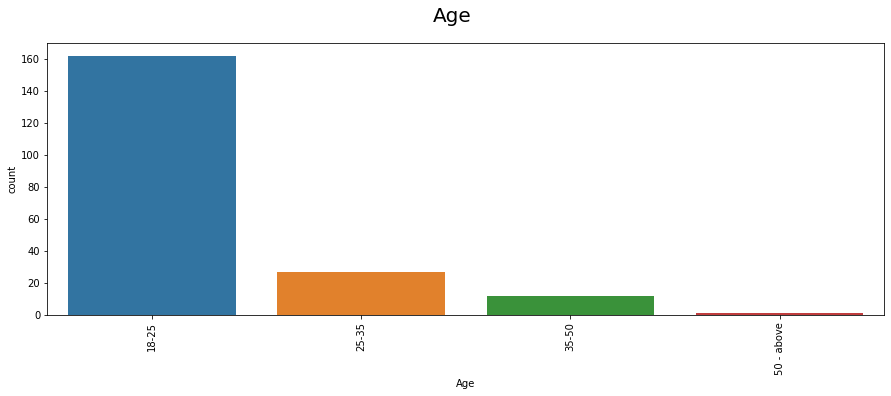

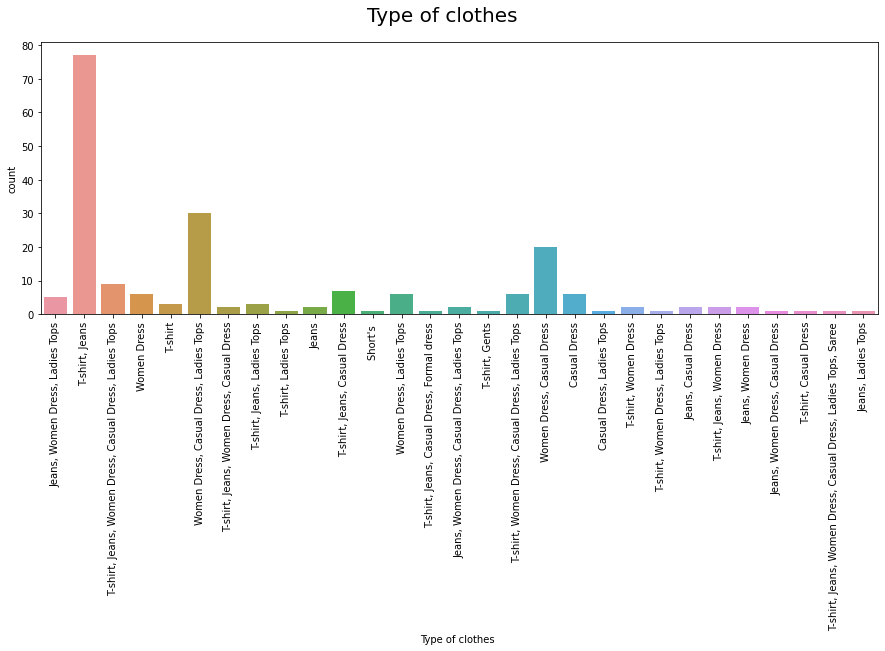

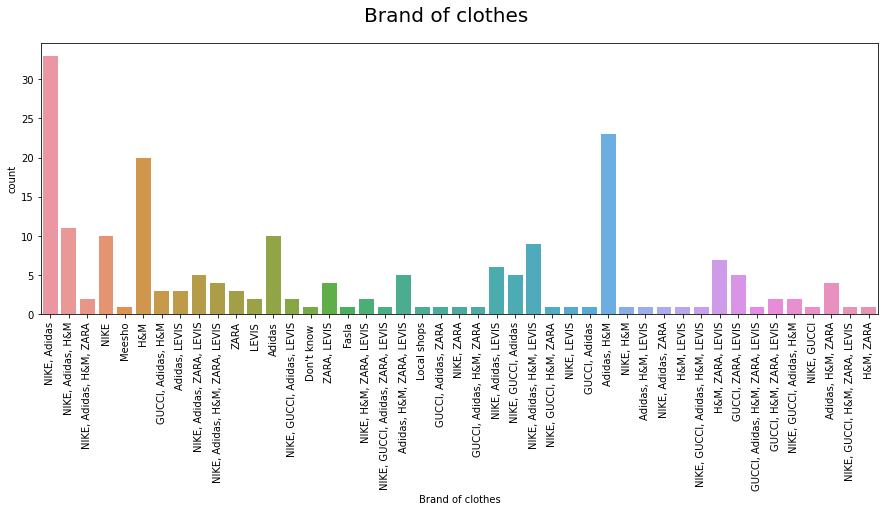

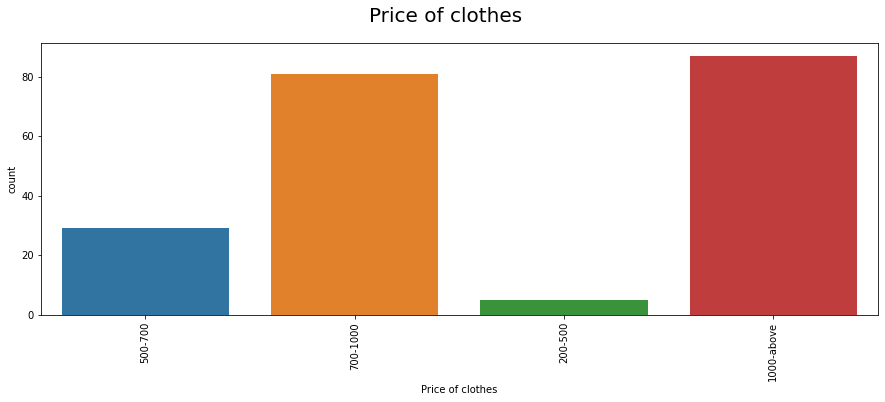

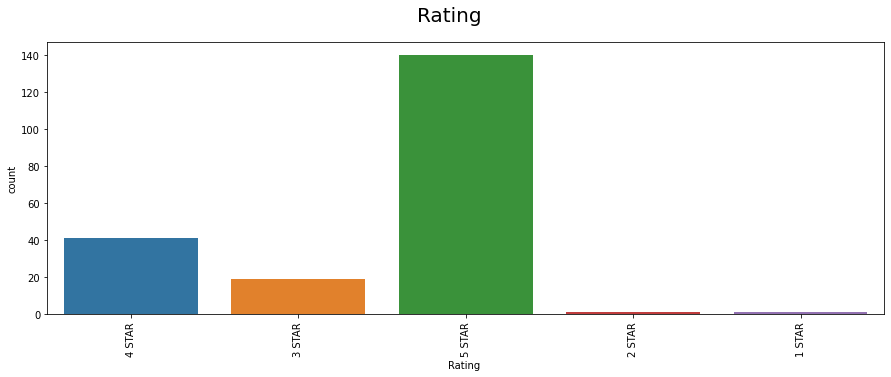

In [91]:
columns_to_exclude = ['Name', 'Timestamp', 'buy clothes', 'time_prefer ', ' prefer purchasing ', 'compare prices ', 
                'any worst experience' ]


for column in Dataset.columns:
    histograms_and_countplots(column, Dataset, columns_to_exclude)

In [92]:
Dataset['Brand of clothes'].head()

0               NIKE, Adidas
1          NIKE, Adidas, H&M
2    NIKE, Adidas, H&M, ZARA
3                       NIKE
4                     Meesho
Name: Brand of clothes, dtype: object

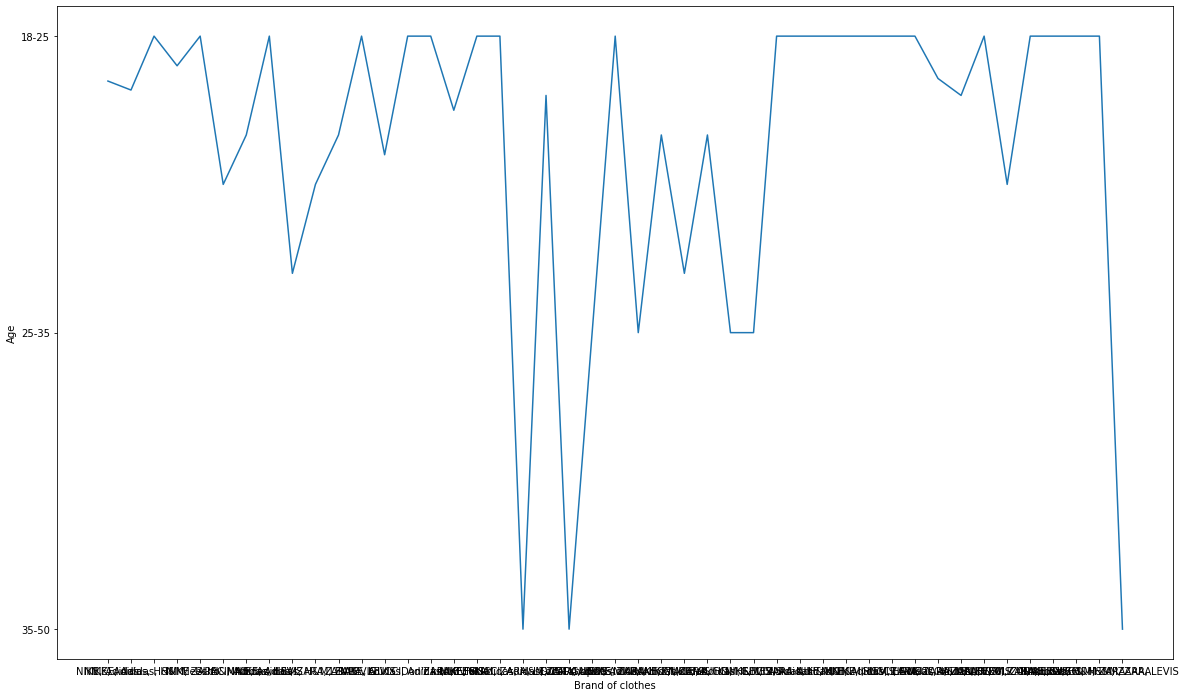

In [93]:
plt.subplots(figsize=(20,12))
sns.lineplot(data=Dataset, x='Brand of clothes', y='Age', ci=None)
plt.show()

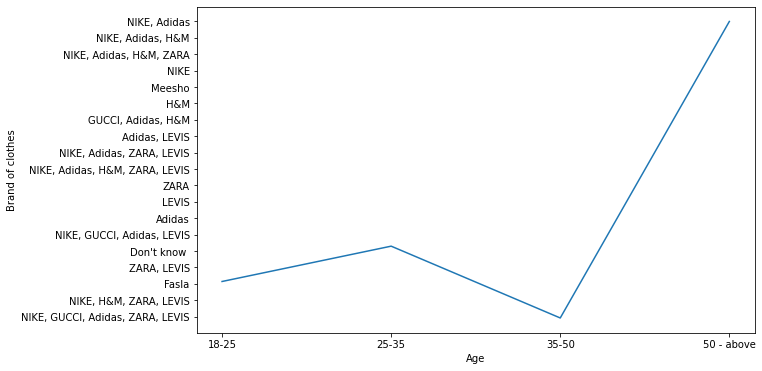

In [94]:
plt.subplots(figsize=(10,6))
sns.lineplot(data=Dataset, x='Age', y='Brand of clothes', ci=None)
plt.show()

In [106]:
px.histogram(Dataset, x='Age', color='Price of clothes', nbins=10)

In [110]:
px.histogram(Dataset, x='Price of clothes', color='Age', nbins=10)

In [107]:
px.histogram(Dataset, x='Age', color='Brand of clothes', nbins=10)

In [109]:
px.histogram(Dataset, x='Brand of clothes', color='Age', nbins=10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')